In [27]:
class MoTransform():
    class Lambda:
        """Apply a user-defined lambda as a transform. This transform does not support torchscript.

        Args:
            lambd (function): Lambda/function to be used for transform.
        """

        def __init__(self, lambd):
            if not callable(lambd):
                raise TypeError("Argument lambd should be callable, got {}".format(repr(type(lambd).__name__)))
            self.lambd = lambd

        def __call__(self, img):
            return self.lambd(img)

        def __repr__(self):
            return self.__class__.__name__ + '()'

    class Compose:
        """Composes several transforms together. This transform does not support torchscript.
        Please, see the note below.

        Args:
            transforms (list of ``Transform`` objects): list of transforms to compose.

        Example:
            >>> transforms.Compose([
            >>>     transforms.CenterCrop(10),
            >>>     transforms.ToTensor(),
            >>> ])
        """

        def __init__(self, transforms):
            self.transforms = transforms

        def __call__(self, img):
            for t in self.transforms:
                img = t(img)
            return img

        def __repr__(self):
            format_string = self.__class__.__name__ + '('
            for t in self.transforms:
                format_string += '\n'
                format_string += '    {0}'.format(t)
            format_string += '\n)'
            return format_string
    def pad_equal_arr(self,img):
        if img.shape[1] > img.shape[2]:
            return np.pad(img,pad_width=((0,0),(0,0),(0,img.shape[1] - img.shape[2])))
        else:
            return np.pad(img,pad_width=((0,0),(0,img.shape[2] - img.shape[1]),(0,0)))

In [30]:
def pad_equal_arr(img):
    if img.shape[1] > img.shape[2]:
        return np.pad(img,pad_width=((0,0),(0,0),(0,img.shape[1] - img.shape[2])))
    else:
        return np.pad(img,pad_width=((0,0),(0,img.shape[2] - img.shape[1]),(0,0)))
trans=[np.flip]
print(Compose(trans)(np.array([[1,2,3],[4,5,6]])))

[[6 5 4]
 [3 2 1]]


### 维度交换

In [47]:
import torch
img=torch.ones(2,3,4,1)
print(img.shape)
#这个函数表示，将原始的tensor，按照自己期望的位置重新排序
print(img.permute(1,2,3,0).shape)
#torch.unsqueeze(n)则是在第n维增加一个维数=1
print(img.unsqueeze(2).shape)
#torch.squeeze(n)函数表示压缩tensor中第n维为1的维数
print(img.squeeze().shape)
#把原本的tensor尺寸，转变为你想要的尺寸
print(img.view(2*3,4*1).shape)

torch.Size([2, 3, 4, 1])
torch.Size([3, 4, 1, 2])
torch.Size([2, 3, 1, 4, 1])
torch.Size([2, 3, 4])
torch.Size([6, 4])


## numpy

In [6]:
import numpy as np
img=np.array([[[1,2,3],[4,5,6],[7,8,9]],[[10,20,30],[40,50,60],[70,80,90]]])
print(img)
print(img.shape)
print(np.flip(img,axis=2))
#ss=np.pad(img,pad_width=((0,0),(2,1),(3,4)))
#print(ss)#(通道数)(向上,向下)(向左，向右)
#print(ss.shape)
#np.flipud() 上下翻转
#np.fliplr()   左右翻转
#np.flip() 根据指定轴进行矩阵翻转
img=np.array([70,80,90])
print(img)
print(np.flip(img,axis=0))
ss=np.pad(img,pad_width=((3,4)))


[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[10 20 30]
  [40 50 60]
  [70 80 90]]]
(2, 3, 3)
[[[ 3  2  1]
  [ 6  5  4]
  [ 9  8  7]]

 [[30 20 10]
  [60 50 40]
  [90 80 70]]]
[70 80 90]
[90 80 70]


In [16]:
def stretch(x, x_min:float=None, x_max:float=None, axis:int=None):
    '''
    parameter:
    x: input data which should be a numpy or DataFrame
    x_min:the minimum value of seqence after transforming,if the parameter x_max is None,it also as a bias
    x_max:the maximum value of seqence after transforming,if the parameter x_min is None ,it also as a bias
    '''
    assert axis in [None, 0], 'axis must equals to None or 0'
    arr_x = np.array(x)
    if x_min is None and x_max is None:
        return x
    elif x_max is None:
        return x - (arr_x.min(axis=axis) - x_min)
    elif x_min is None:
        return x - (arr_x.max(axis=axis) - x_max)
    else:
        xmin, xmax = arr_x.min(axis=axis), arr_x.max(axis=axis)
        return (x - xmin) * (x_max - x_min) / (xmax - xmin) + x_min


In [19]:
s=np.array([1,2,3]).reshape(-1,1)
print(s.max())
print(s.repeat(2, axis=0))
print(s.shape)
print(np.tile(s, (1,5)))

3
[[1]
 [1]
 [2]
 [2]
 [3]
 [3]]
(3, 1)
[[1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]


In [23]:
def pad_equal_arr(img):
    if img.shape[1] > img.shape[2]:
        return np.pad(img,pad_width=((0,0),(0,0),(0,img.shape[1] - img.shape[2])))
    else:
        return np.pad(img,pad_width=((0,0),(0,img.shape[2] - img.shape[1]),(0,0)))

In [26]:
img=np.array([[[1,2,3,4],[4,5,6,7],[7,8,9,10]],[[10,20,30,40],[40,50,60,70],[70,80,90,100]]])
img=np.array([[[1,2],[4,5],[7,8]],[[10,20],[40,50],[70,80]]])

print(pad_equal_arr(img))

[[[ 1  2  0]
  [ 4  5  0]
  [ 7  8  0]]

 [[10 20  0]
  [40 50  0]
  [70 80  0]]]


## ndimage

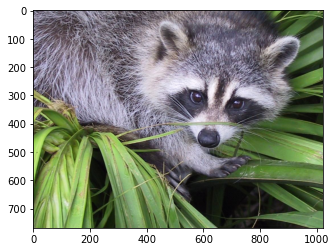

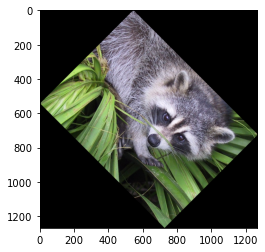

In [2]:
from scipy import misc
from scipy import ndimage
import matplotlib.pyplot as plt
face = misc.face()#face是测试图像之一
plt.figure()#创建图形
plt.imshow(face)#绘制测试图像
plt.show()#原始图像
image = ndimage.rotate(face, angle=-45)
plt.imshow(image)#绘制测试图像

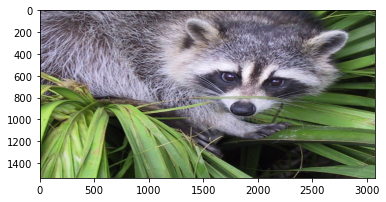

In [4]:
image = ndimage.zoom(face,[2,3,1])
plt.imshow(image)#绘制测试图像

[[1 1 2]
 [2 3 3]
 [4 4 5]
 [5 6 6]]
[[1 1 2]
 [2 3 3]
 [4 4 5]
 [5 6 6]]
[[1 1 2]
 [2 3 3]
 [4 4 5]
 [5 6 6]]


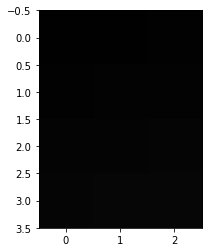

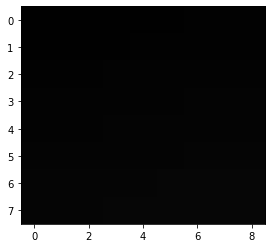

In [60]:
s=np.array([[1,2,3,4,5,6]*6]).reshape(4,3,3)
for i in range(3):

    s[:,:,i]=np.array([1,1,2,2,3,3,4,4,5,5,6,6]).reshape(4,3)
    print(s[:,:,i])

plt.imshow(s)
plt.show()
plt.imshow(ndimage.zoom(s,[2,3,1],order=2))
plt.show()

## PIL

In [6]:
import numpy as np
s=np.array([[1,2,3],[4,5,6],[7,8,9]])
print(s)
b=Image.fromarray(s)
print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
<PIL.Image.Image image mode=I size=3x3 at 0x202A187AAF0>


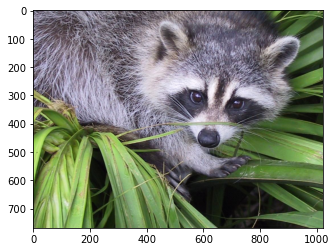

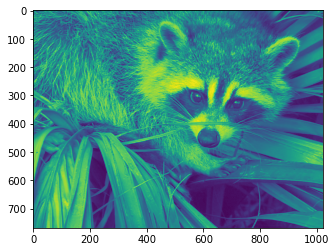

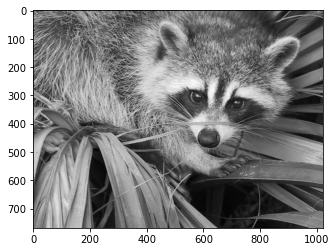

In [3]:
import PIL.Image as Image
from scipy import misc
face=Image.fromarray(misc.face())
img = face.convert('RGB')
plt.imshow(img)
plt.show()
img=face.convert('L')
plt.imshow(img)
plt.show()
img=face.convert('L').convert('RGB')
plt.imshow(img)
plt.show()

## transform
["Compose", "ToTensor", "PILToTensor", "ConvertImageDtype", "ToPILImage", "Normalize", "Resize", "Scale",
           "CenterCrop", "Pad", "Lambda", "RandomApply", "RandomChoice", "RandomOrder", "RandomCrop",
           "RandomHorizontalFlip", "RandomVerticalFlip", "RandomResizedCrop", "RandomSizedCrop", "FiveCrop", "TenCrop",
           "LinearTransformation", "ColorJitter", "RandomRotation", "RandomAffine", "Grayscale", "RandomGrayscale",
           "RandomPerspective", "RandomErasing", "GaussianBlur", "InterpolationMode", "RandomInvert", "RandomPosterize",
           "RandomSolarize", "RandomAdjustSharpness", "RandomAutocontrast", "RandomEqualize"]

(768, 1024, 3)
(1024, 768)
<PIL.Image.Image image mode=RGB size=1024x768 at 0x1BDCD25B430>
torch.Size([3, 768, 1024])


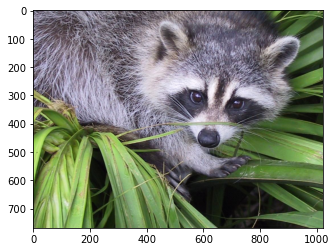

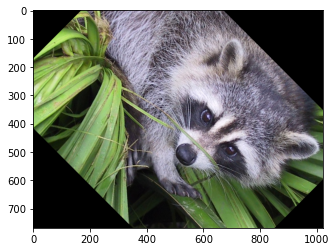

In [6]:
import torch
from scipy import misc
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
'''
InterpolationMode(Enum):
    NEAREST = "nearest"
    BILINEAR = "bilinear"
    BICUBIC = "bicubic"
    # For PIL compatibility
    BOX = "box"
    HAMMING = "hamming"
    LANCZOS = "lanczos"
'''
def pad_equal(img):
    if img.size[1]>img.size[0]:
        return transforms.Pad([0,0,img.size[1]-img.size[0],0])(img)
    else:
        return transforms.Pad([0,0,0,img.size[0]-img.size[1]])(img)
transform_image_list = [
    
        #transforms.CenterCrop((128,128)),
        #transforms.Resize((384,512), InterpolationMode.BICUBIC),
        #transforms.RandomVerticalFlip(p=1),
        #transforms.Pad([40,5,15,25]),
        #transforms.RandomHorizontalFlip(p=1),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),\
        #transforms.Lambda(lambda img:pad_equal(img)),
        transforms.RandomRotation(degrees=(-45,-45)),
        transforms.ToTensor(),
    ]
print(misc.face().shape)
print(face.size)
print(face)
img=transforms.Compose(transform_image_list)(face)
print(img.shape)

plt.imshow(misc.face())#绘制测试图像
plt.show()#原始图像
#img=Image.fromarray(img)
plt.imshow(img.permute(1,2,0))#torch.transpose(img,1,0)


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_13192/967463628.py:18: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  image_label_overlay =color.label2rgb(label_image, image=image) #不同标记用不同颜色显示


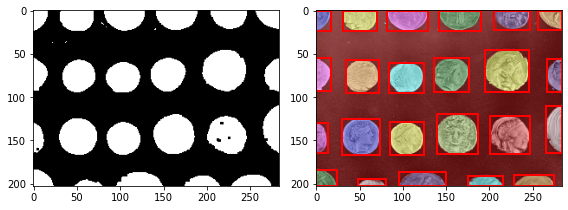

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage import data,filters,segmentation,measure,morphology,color

#加载并裁剪硬币图片
image = data.coins()[50:-50, 50:-50]

thresh =filters.threshold_otsu(image) #阈值分割
bw =morphology.closing(image > thresh, morphology.square(3)) #闭运算

cleared = bw.copy()  #复制
segmentation.clear_border(cleared)  #清除与边界相连的目标物

label_image =measure.label(cleared)  #连通区域标记
borders = np.logical_xor(bw, cleared) #异或
label_image[borders] = -1
image_label_overlay =color.label2rgb(label_image, image=image) #不同标记用不同颜色显示

fig,(ax0,ax1)= plt.subplots(1,2, figsize=(8, 6))
ax0.imshow(cleared,plt.cm.gray)
ax1.imshow(image_label_overlay)

for region in measure.regionprops(label_image): #循环得到每一个连通区域属性集
    
    #忽略小区域
    if region.area < 100:
        continue

    #绘制外包矩形
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax1.add_patch(rect)
fig.tight_layout()
plt.show()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_13192/3258323053.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img=color.rgb2gray(data.horse())


Text(0.5, 1.0, 'convex_hull image')

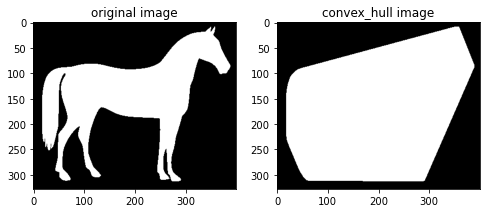

In [9]:
import matplotlib.pyplot as plt
from skimage import data,color,morphology

#生成二值测试图像
img=color.rgb2gray(data.horse())
img=(img<0.5)*1

chull = morphology.convex_hull_image(img)

#绘制轮廓
fig, axes = plt.subplots(1,2,figsize=(8,8))
ax0, ax1= axes.ravel()
ax0.imshow(img,plt.cm.gray)
ax0.set_title('original image')

ax1.imshow(chull,plt.cm.gray)
ax1.set_title('convex_hull image')

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_13192/3926061849.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img=color.rgb2gray(data.coins())


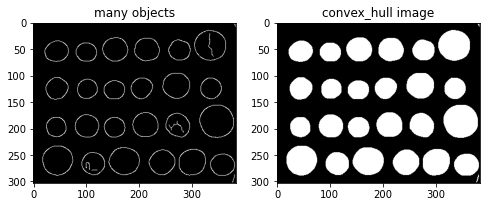

In [10]:
import matplotlib.pyplot as plt
from skimage import data,color,morphology,feature

#生成二值测试图像
img=color.rgb2gray(data.coins())
#检测canny边缘,得到二值图片
edgs=feature.canny(img, sigma=3, low_threshold=10, high_threshold=50) 

chull = morphology.convex_hull_object(edgs)

#绘制轮廓
fig, axes = plt.subplots(1,2,figsize=(8,8))
ax0, ax1= axes.ravel()
ax0.imshow(edgs,plt.cm.gray)
ax0.set_title('many objects')
ax1.imshow(chull,plt.cm.gray)
ax1.set_title('convex_hull image')
plt.show()

regions number: 9


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_13192/2751342282.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_13192/2751342282.py:20: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  dst=color.label2rgb(labels)  #根据不同的标记显示不同的颜色


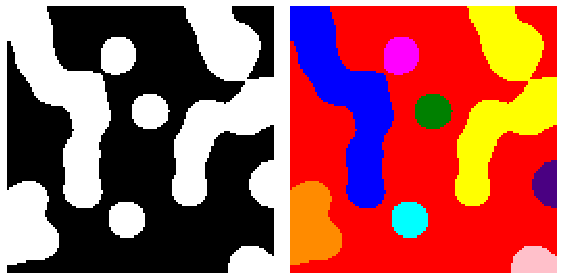

In [11]:
import numpy as np
import scipy.ndimage as ndi
from skimage import measure,color
import matplotlib.pyplot as plt

#编写一个函数来生成原始二值图像
def microstructure(l=256):
    n = 5
    x, y = np.ogrid[0:l, 0:l]  #生成网络
    mask = np.zeros((l, l))
    generator = np.random.RandomState(1)  #随机数种子
    points = l * generator.rand(2, n**2)
    mask[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
    mask = ndi.gaussian_filter(mask, sigma=l/(4.*n)) #高斯滤波
    return mask > mask.mean()

data = microstructure(l=128)*1 #生成测试图片

labels=measure.label(data,connectivity=2)  #8连通区域标记
dst=color.label2rgb(labels)  #根据不同的标记显示不同的颜色
print('regions number:',labels.max()+1)  #显示连通区域块数(从0开始标记)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(data, plt.cm.gray, interpolation='nearest')
ax1.axis('off')
ax2.imshow(dst,interpolation='nearest')
ax2.axis('off')

fig.tight_layout()
plt.show()